In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from alpharaw.thermo import ThermoRawData
from alpharaw.ms_data_base import MSData_Base

In [2]:
from alphabase.spectral_library.base import SpecLibBase
from alphabase.spectral_library.flat import SpecLibFlat

In [3]:


speclib = SpecLibBase()
speclib.load_hdf('/Users/georgwallmann/Documents/data/alphadia_transfer_learning/2024_10_07_zenotof/transfer_pass/speclib.hdf')

speclib = SpecLibBase()
speclib.load_hdf('/Users/georgwallmann/Documents/data/alphadia_transfer_learning/2024_10_07_zenotof/transfer_pass/speclib.hdf')

speclib_flat = SpecLibFlat()
speclib_flat.parse_base_library(speclib)




In [4]:
import alpha_rs

lib = alpha_rs.SpecLibFlat.from_arrays(
    speclib_flat.precursor_df['precursor_mz'].values.astype(np.float32),
    speclib_flat.precursor_df['flat_frag_start_idx'].values,
    speclib_flat.precursor_df['flat_frag_stop_idx'].values,
    speclib_flat.fragment_df['mz'].values.astype(np.float32),
    speclib_flat.fragment_df['intensity'].values.astype(np.float32)
)

In [ ]:
lib.num_precursors

64890

In [6]:
from alpharaw.ms_data_base import MSData_Base

dia_data = MSData_Base()
dia_data.load_hdf('/Users/georgwallmann/Documents/data/alphadia_tutorials/libfree-gui/raw_data/20231024_OA3_TiHe_ADIAMA_HeLa_200ng_Evo01_21min_F-40_iO_before_03.hdf')


In [7]:
cycle_len = 301
delta_scan_idx = np.tile(np.arange(cycle_len), int(len(dia_data.spectrum_df) / cycle_len + 1 ))
cycle_idx = np.repeat(np.arange(int(len(dia_data.spectrum_df) / cycle_len + 1 )), cycle_len)

dia_data.spectrum_df['delta_scan_idx'] = delta_scan_idx[:len(dia_data.spectrum_df)]
dia_data.spectrum_df['cycle_idx'] = cycle_idx[:len(dia_data.spectrum_df)]
print(cycle_len)

301


In [8]:
dia_data.spectrum_df

,isolation_lower_mz,isolation_upper_mz,ms_level,nce,peak_start_idx,peak_stop_idx,precursor_charge,precursor_mz,rt,spec_idx,delta_scan_idx,cycle_idx
0,-1.000000,-1.000000,1,0.0,0,31,0,-1.00000,0.000000,0,0,0
1,380.422795,382.423705,2,25.0,31,33,0,381.42325,0.000451,1,1,0
2,382.423705,384.424615,2,25.0,33,33,0,383.42416,0.000542,2,2,0
3,386.425535,388.426445,2,25.0,33,33,0,387.42599,0.000676,3,3,0
4,390.427345,392.428255,2,25.0,33,33,0,391.42780,0.000756,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
242553,788.608375,790.609285,2,25.0,155906351,155906392,0,789.60883,20.887091,242553,248,805
242554,790.609225,792.610135,2,25.0,155906392,155906415,0,791.60968,20.887179,242554,249,805
242555,794.611055,796.611965,2,25.0,155906415,155906440,0,795.61151,20.887260,242555,250,805
242556,798.612885,800.613795,2,25.0,155906440,155906465,0,799.61334,20.887339,242556,251,805


In [9]:

import alpha_rs

rs_data = alpha_rs.test_xic_index(
    dia_data.spectrum_df['delta_scan_idx'].values,
    dia_data.spectrum_df['isolation_lower_mz'].values.astype(np.float32),
    dia_data.spectrum_df['isolation_upper_mz'].values.astype(np.float32),
    dia_data.spectrum_df['peak_start_idx'].values,
    dia_data.spectrum_df['peak_stop_idx'].values,
    dia_data.spectrum_df['cycle_idx'].values,
    dia_data.spectrum_df['rt'].values.astype(np.float32),
    dia_data.peak_df['mz'].values.astype(np.float32),
    dia_data.peak_df['intensity'].values.astype(np.float32)
)

In [12]:
mass_tolerance = 15

rs_data.search(
    lib,
    mass_tolerance
)


Precursors per second: 52520.17


In [11]:
path = '/Users/georgwallmann/Documents/data/alpha-rs/dense_xic.npz'

In [12]:
array = np.load(path)['dense_xic']
array.shape

(7, 806)

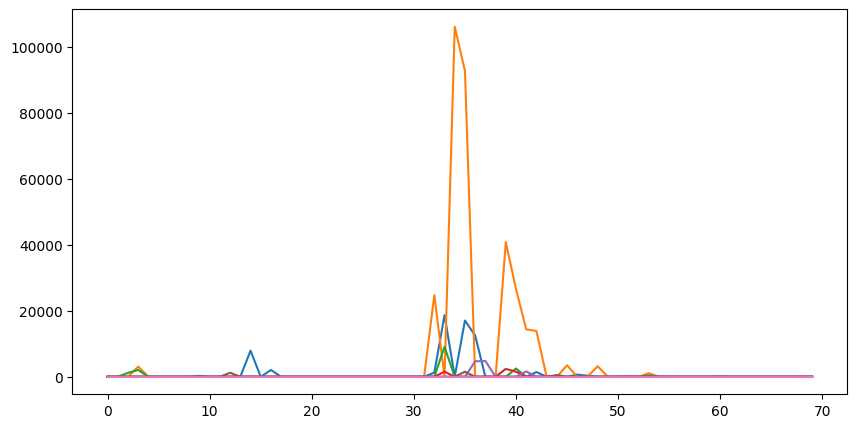

In [16]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
for i in range(array.shape[0]):
    ax.plot(array[i,230:300])
plt.show()


In [10]:
dia_data.peak_df

,intensity,mz
0,7152.893066,413.284882
1,7339.181641,461.691620
2,8405.365234,479.127350
3,7875.626953,486.764893
4,7765.384766,495.953583
...,...,...
155906486,347.197144,867.576721
155906487,249.008377,875.574829
155906488,388.607117,1288.736450
155906489,181.067413,1454.766968


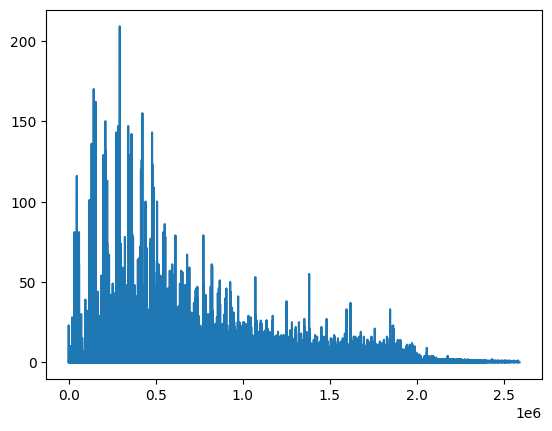

In [14]:
import matplotlib.pyplot as plt

plt.plot(hist)